In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('AirPassengers.csv')

In [54]:
df.Month = pd.to_datetime(df.Month)
df = df.set_index("Month")
df

,AirPassengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [55]:
train, test = df[:-12], df[-12:]

In [56]:
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [57]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [58]:
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [59]:
model.fit_generator(generator,epochs=90)

Epoch 1/90
20/20 [==============================] - 0s 24ms/step - loss: 0.0662
Epoch 2/90
20/20 [==============================] - 0s 11ms/step - loss: 0.0162
Epoch 3/90
20/20 [==============================] - 0s 15ms/step - loss: 0.0122
Epoch 4/90
20/20 [==============================] - 0s 15ms/step - loss: 0.0098
Epoch 5/90
20/20 [==============================] - 0s 16ms/step - loss: 0.0095
Epoch 6/90
20/20 [==============================] - 0s 14ms/step - loss: 0.0096
Epoch 7/90
20/20 [==============================] - 0s 11ms/step - loss: 0.0102
Epoch 8/90
20/20 [==============================] - 0s 14ms/step - loss: 0.0093
Epoch 9/90
20/20 [==============================] - 0s 13ms/step - loss: 0.0082
Epoch 10/90
20/20 [==============================] - 0s 15ms/step - loss: 0.0102
Epoch 11/90
20/20 [==============================] - 0s 14ms/step - loss: 0.0084
Epoch 12/90
20/20 [==============================] - 0s 14ms/step - loss: 0.0087
Epoch 13/90
20/20 [==================

In [60]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))
batch

array([[[0.56263736],
        [0.52307692],
        [0.66373626],
        [0.64175824],
        [0.69450549],
        [0.80879121],
        [0.97582418],
        [1.        ],
        [0.78901099],
        [0.66593407],
        [0.56703297],
        [0.66153846]]])

In [61]:
for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

pred_list

[array([0.6226184], dtype=float32),
 array([0.637746], dtype=float32),
 array([0.68358153], dtype=float32),
 array([0.69327193], dtype=float32),
 array([0.7629736], dtype=float32),
 array([0.912593], dtype=float32),
 array([1.0492152], dtype=float32),
 array([1.0349419], dtype=float32),
 array([0.8752669], dtype=float32),
 array([0.74939406], dtype=float32),
 array([0.71051764], dtype=float32),
 array([0.7230561], dtype=float32)]

In [64]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),index=df[-n_input:].index, columns=['Prediction'])

df_test = pd.concat([df,df_predict], axis=1)

No handles with labels found to put in legend.


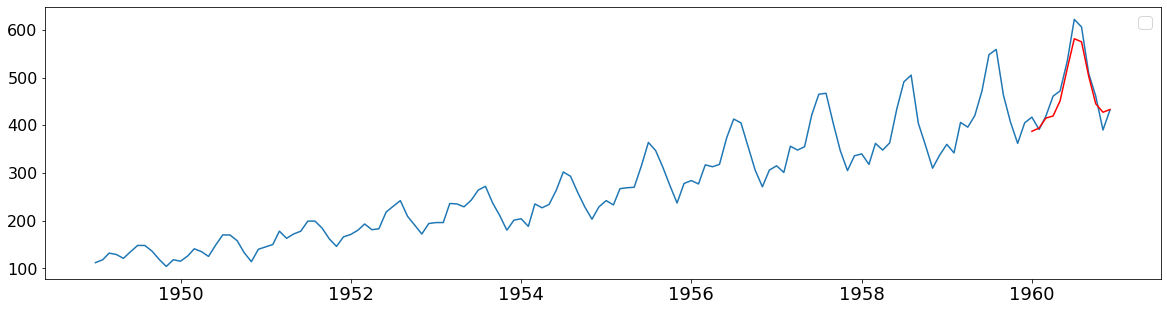

In [63]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['AirPassengers'])
plt.plot(df_test.index, df_test['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [65]:
pred_actual_rmse = rmse(df_test.iloc[-n_input:, [0]], df_test.iloc[-n_input:, [1]])
print("rmse: ", pred_actual_rmse)

rmse:  [25.19330668]


In [66]:
train = df

In [67]:
scaler.fit(train)
train = scaler.transform(train)

In [68]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [69]:
model.fit_generator(generator,epochs=90)

Epoch 1/90
22/22 [==============================] - 0s 11ms/step - loss: 0.0023
Epoch 2/90
22/22 [==============================] - 0s 10ms/step - loss: 0.0033
Epoch 3/90
22/22 [==============================] - 0s 9ms/step - loss: 0.0020
Epoch 4/90
22/22 [==============================] - 0s 10ms/step - loss: 0.0022
Epoch 5/90
22/22 [==============================] - 0s 10ms/step - loss: 0.0017
Epoch 6/90
22/22 [==============================] - 0s 10ms/step - loss: 0.0023
Epoch 7/90
22/22 [==============================] - 0s 10ms/step - loss: 0.0019
Epoch 8/90
22/22 [==============================] - 0s 10ms/step - loss: 0.0031
Epoch 9/90
22/22 [==============================] - 0s 10ms/step - loss: 0.0016
Epoch 10/90
22/22 [==============================] - 0s 10ms/step - loss: 0.0020
Epoch 11/90
22/22 [==============================] - 0s 9ms/step - loss: 0.0027
Epoch 12/90
22/22 [==============================] - 0s 10ms/step - loss: 0.0037
Epoch 13/90
22/22 [====================

In [70]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [71]:
from pandas.tseries.offsets import DateOffset
add_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,13) ]
future_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)

In [72]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=future_dates[-n_input:].index, columns=['Prediction'])

df_proj = pd.concat([df,df_predict], axis=1)

No handles with labels found to put in legend.


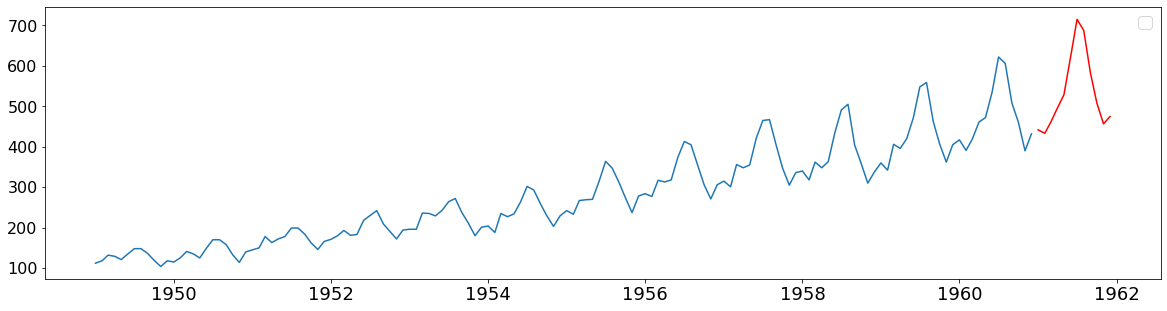

In [73]:
plt.figure(figsize=(20, 5))
plt.plot(df_proj.index, df_proj['AirPassengers'])
plt.plot(df_proj.index, df_proj['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()